In [37]:
import sys
import os
sys.path.append(os.path.abspath(".."))

from src import utils as u
import pandas as pd
import seaborn as sns

In [14]:
# Load X_train.
X_TRAIN_PATH = "data/interim/X_train.pkl"

X_train = u.deserialize_data(X_TRAIN_PATH)

In [15]:
# Load y_train.
Y_TRAIN_PATH = "data/interim/y_train.pkl"

y_train = u.deserialize_data(Y_TRAIN_PATH)

In [17]:
# X_train head
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15884,25,241875,MORTGAGE,4.0,EDUCATION,A,16000,7.05,0.07,N,4
15138,21,18000,RENT,5.0,PERSONAL,B,1500,12.18,0.08,N,4
7474,25,53000,MORTGAGE,10.0,MEDICAL,B,16000,12.53,0.30,N,2
18212,28,16800,OWN,NaN,MEDICAL,C,5000,13.98,0.30,N,8
6493,25,50000,MORTGAGE,2.0,VENTURE,A,10000,7.90,0.20,N,2


In [18]:
num_col = [
    "person_age",
    "person_income",
    "person_emp_length",
    "loan_amnt",
    "loan_int_rate",
    "loan_percent_income",
    "cb_person_cred_hist_length"
]


cat_col = [
    "person_home_ownership",
    "loan_intent",
    "loan_grade",
    "cb_person_default_on_file"
]

num_col, cat_col

(['person_age',
  'person_income',
  'person_emp_length',
  'loan_amnt',
  'loan_int_rate',
  'loan_percent_income',
  'cb_person_cred_hist_length'],
 ['person_home_ownership',
  'loan_intent',
  'loan_grade',
  'cb_person_default_on_file'])

In [19]:
X_train.info()

<class 'pandas.DataFrame'>
Index: 26064 entries, 15884 to 17068
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  26064 non-null  int64  
 1   person_income               26064 non-null  int64  
 2   person_home_ownership       26064 non-null  str    
 3   person_emp_length           25326 non-null  float64
 4   loan_intent                 26064 non-null  str    
 5   loan_grade                  26064 non-null  str    
 6   loan_amnt                   26064 non-null  int64  
 7   loan_int_rate               23563 non-null  float64
 8   loan_percent_income         26064 non-null  float64
 9   cb_person_default_on_file   26064 non-null  str    
 10  cb_person_cred_hist_length  26064 non-null  int64  
dtypes: float64(3), int64(4), str(4)
memory usage: 2.4 MB


### Conclusion:

Based on the observations using the  `head()` function:

- **Numerical columns**:

  `person_age`, `person_income`, `person_emp_length`, `loan_amnt`, `loan_int_rate`, `loan_percent_income`,  `cb_person_cred_hist_length`

- **Categorical columns**:

  `person_home_ownership`, `loan_intent`, `loan_grade`, `cb_person_default_on_file`

After checking with the `info()` function, the displayed data types match the initial observations:

- Numerical columns have data types `int64` and `float64`

- Categorical columns have data type `object`

The next step is to check for duplicate values and missing values before proceeding to the preprocessing stage.

In [26]:
# Check duplicate data on X_train
dup_data = X_train[X_train.duplicated(keep=False)]

# Sort based on person_income
dup_data = dup_data.sort_values(by="person_income")

dup_data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15952,24,7800,RENT,1.0,EDUCATION,B,1000,11.36,0.13,N,4
16821,24,7800,RENT,1.0,EDUCATION,B,1000,11.36,0.13,N,4
2431,21,15600,RENT,0.0,MEDICAL,A,2800,7.40,0.18,N,4
17758,21,15600,RENT,0.0,MEDICAL,A,2800,7.40,0.18,N,4
28295,32,18000,OWN,0.0,VENTURE,A,4750,7.88,0.26,N,6
...,...,...,...,...,...,...,...,...,...,...,...
27677,35,160000,OWN,10.0,VENTURE,B,24000,11.83,0.15,N,9
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0.08,N,17
29160,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0.08,N,17
27881,28,604000,MORTGAGE,12.0,PERSONAL,B,25000,9.01,0.04,N,9


### Conclusion:
Based on the duplicate checking process using the `duplicated()` function with `keep=False`, a total of 192 rows were identified as duplicate data in `X_train`.

This indicates that there are observations with identical values across all columns. Duplicate data can potentially bias the machine learning model because certain information is repeated multiple times.

Therefore, the next step is to remove duplicate rows from `X_train` to ensure that the dataset is clean and does not introduce bias during the training process.

In [27]:
# Check sum of null value on every column
null_count = X_train.isnull().sum()

null_count

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              738
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2501
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [28]:
null_count[null_count > 0]

person_emp_length     738
loan_int_rate        2501
dtype: int64

### Missing Value Checking Conclusion:

Based on the null value checking process using the `isnull().sum()` function, missing values were identified in two columns of the `X_train` dataset:

- `person_emp_length` has 738 missing values.
- `loan_int_rate` has 2501 missing values.

Missing values in these columns may negatively impact the machine learning model performance, especially since both columns are numerical features. Therefore, appropriate imputation techniques such as mean or median imputation will be applied during the preprocessing stage to handle these missing values.

In [30]:
# Make temporary variable with numeric column
X_train_ = X_train[num_col]

X_train_.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
15884,25,241875,4.0,16000,7.05,0.07,4
15138,21,18000,5.0,1500,12.18,0.08,4
7474,25,53000,10.0,16000,12.53,0.30,2
18212,28,16800,NaN,5000,13.98,0.30,8
6493,25,50000,2.0,10000,7.90,0.20,2


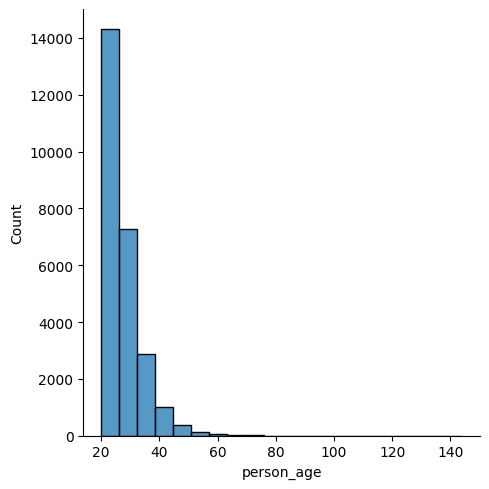

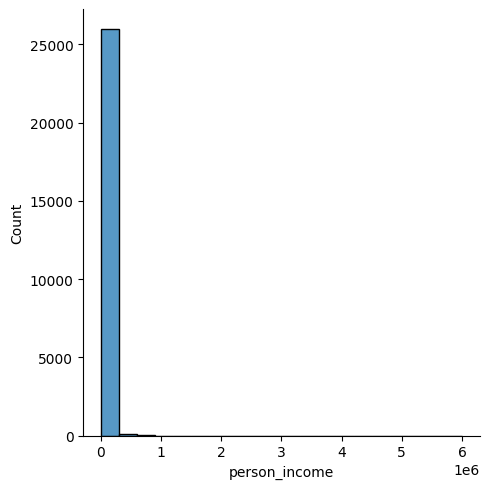

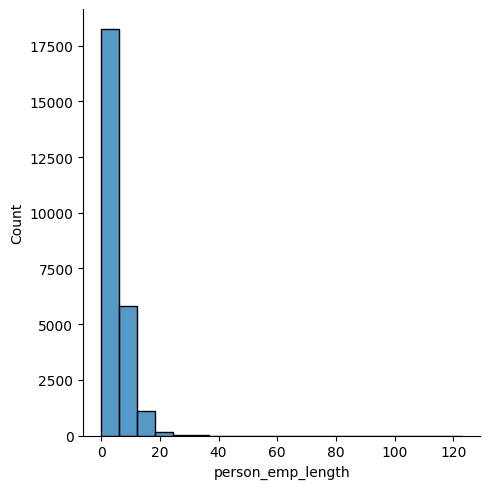

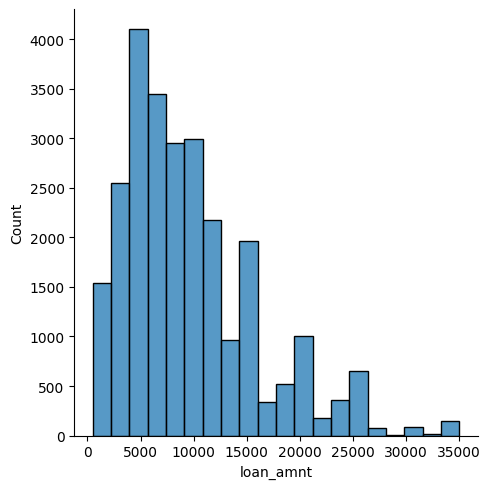

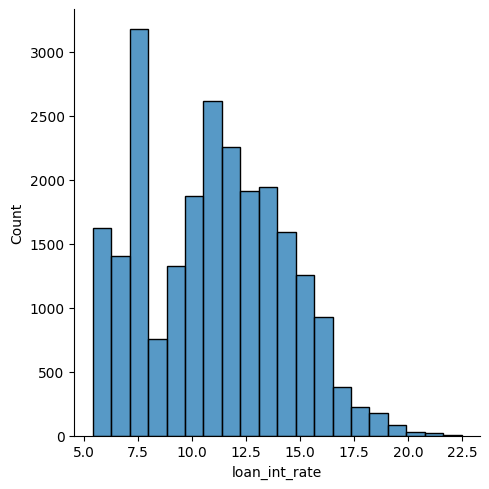

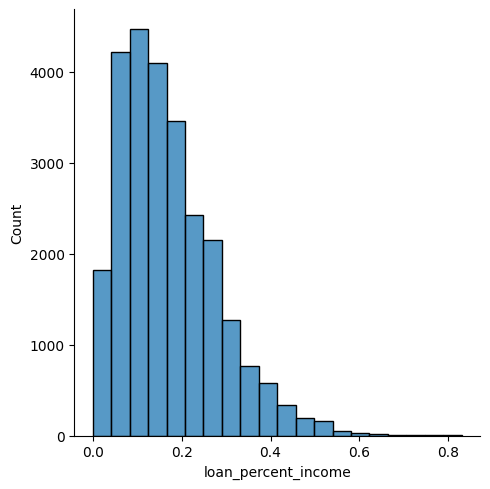

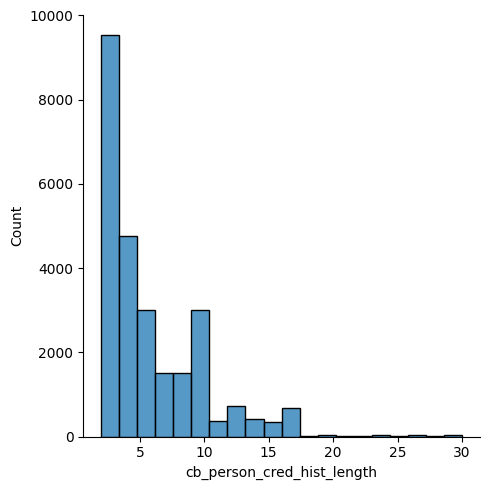

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in X_train_.columns:
    sns.displot(
        data=X_train_,
        x=col,
        bins=20
    )

    plt.show()

### Distribution Analysis Conclusion:

Based on the histogram visualization of all numerical features:

1. `person_age`  
   The distribution is slightly right-skewed, with most values concentrated between 20 and 40 years old. 

2. `person_income`  
   The distribution is heavily right-skewed. Most observations are concentrated at lower income levels, while a small number of observations extend to much higher values. This indicates the presence of high-value outliers.

3. `person_emp_length`  
   The distribution is right-skewed, with most values under 10 years of employment length. A small number of higher values create a long right tail.

4. `loan_amnt`  
   The distribution is moderately right-skewed. Most loan amounts are clustered in lower ranges, with fewer high-value loans.

5. `loan_int_rate`  
   The distribution appears relatively symmetric compared to other features, with no extreme skewness observed.

6. `loan_percent_income`  
   The distribution is right-skewed, with most values concentrated at lower ratios and fewer higher values.

7. `cb_person_cred_hist_length`  
   The distribution is slightly right-skewed, with most values in the lower range and a gradual decline toward higher values.

### Overall Conclusion:

Most numerical features exhibit right-skewed distributions, particularly income-related variables. This suggests that the dataset contains some high-value observations that may influence model performance.

In the preprocessing stage, the following actions may be considered:
- Apply scaling techniques (e.g., StandardScaler or MinMaxScaler) for numerical variables.
- Consider transformation (e.g., log transformation) for highly skewed features such as `person_income`.
- Evaluate potential outliers before model training.


In [35]:
# Cast y_train into DataFrame
y_train = y_train.to_frame(name="loan_status")

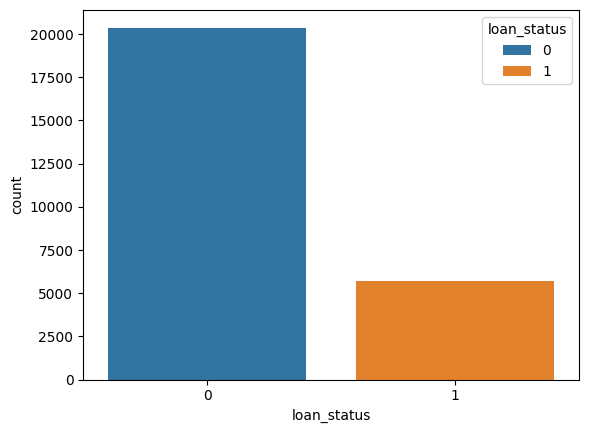

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(
    data = y_train,
    x = "loan_status",
    hue = "loan_status"
)

plt.show()

### Target Balance Conclusion:

Based on the countplot visualization, the target variable `loan_status` is imbalanced.

Class 0 (non-default) significantly dominates the dataset, accounting for approximately 78–80% of the observations, while class 1 (default) represents around 20–22%.

This class imbalance may cause the model to be biased toward predicting the majority class. Therefore, imbalance handling techniques such as class weighting, oversampling (e.g., SMOTE), or undersampling may be considered during the modeling stage.


## Exploratory Data Analysis (EDA) Summary
---

Based on the exploratory data analysis performed on the training dataset, the following conclusions were obtained:

1. Data Types Identification  
   Numerical and categorical columns were successfully identified. Numerical features consist of integer and float data types, while categorical features consist of object data types. The data types observed from the `.info()` output match the initial manual categorization.

2. Duplicate Data  
   Duplicate checking using `duplicated(keep=False)` on `X_train` revealed the presence of duplicated rows. These duplicates need to be handled during the preprocessing stage to prevent bias in model training.

3. Missing Values  
   Missing values were found in several numerical columns, particularly:
   - `person_emp_length`
   - `loan_int_rate`

   These missing values will require appropriate imputation techniques during preprocessing.

4. Numerical Feature Distribution  
   Most numerical variables exhibit right-skewed distributions, especially income-related features such as `person_income`. Some variables show moderate skewness but remain within realistic ranges.

   Therefore, potential preprocessing steps include:
   - Applying scaling techniques (e.g., StandardScaler or MinMaxScaler)
   - Considering transformation (e.g., log transformation) for highly skewed variables
   - Evaluating and handling outliers if necessary

5. Target Variable Balance  
   The target variable `loan_status` is imbalanced. The distribution is approximately 80:20.

   This imbalance may affect model performance, and techniques such as class weighting or resampling may be considered during model development.

### Overall Conclusion

The dataset shows common real-world characteristics such as skewed distributions, missing values, duplicate records, and class imbalance. These findings indicate that a structured preprocessing pipeline will be required before model training to ensure optimal and unbiased model performance.
